In [ ]:
import pandas as pd
import numpy as np
import pydot as pydot
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly.express as px
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,6)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn import metrics
from sklearn import tree
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.metrics import brier_score_loss
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow import keras
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn import over_sampling
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn import preprocessing
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

root_path = '/content/drive/My Drive/'

Mounted at /content/drive


# Read data

In [ ]:
X_train = pd.read_csv(root_path+'X_train_lvl1.csv')
y_train = pd.read_csv(root_path+'y_train_lvl1.csv')
X_test = pd.read_csv(root_path+'X_test_lvl1.csv')
y_test = pd.read_csv(root_path+'y_test_lvl1.csv')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(122067, 66) (122067, 1) (40690, 66) (40690, 1)


In [ ]:
df = pd.read_csv(root_path+'df_high_low_wealth.csv')
print(df.shape)

(22, 20)


In [ ]:
y_train = ~y_train+2

In [ ]:
X_train.describe()

HOU_HOLHOMOWNR        OWNSHIP           AREA          ROOMS  \
count   122067.000000  122067.000000  122067.000000  122067.000000   
mean         0.052316       0.579796     111.705170       3.895189   
std          0.222663       0.493593      51.641737       5.203504   
min          0.000000       0.000000       0.000000       0.000000   
25%          0.000000       0.000000      79.000000       3.000000   
50%          0.000000       1.000000     100.000000       4.000000   
75%          0.000000       1.000000     136.000000       5.000000   
max          1.000000       1.000000    2544.000000     999.000000   

       BUSINESS_ON_ADRESS  PER_COU_UNADR        CAR_AVG        EDU_AVG  \
count       122067.000000  122067.000000  122067.000000  122067.000000   
mean             0.144412       2.111119       0.985392      13.487867   
std              0.351509       0.867941       0.479280       1.612151   
min              0.000000       0.017200       0.000000      10.000000   
25%              0.000000       1.611750       0.570000      12.330000   
50%              0.000000       2.000000       1.030000      13.330000   
75%              0.000000       2.500000       1.490000      14.620000   
max              1.000000      93.000000       1.680000      18.000000   

       HOU_INCO_AVG     SOCGRP_AVG  ...      CNZTYP_H1      CNZTYP_H2  \
count  1.220670e+05  122067.000000  ...  122067.000000  122067.000000   
mean   6.537675e+05       3.033460  ...       0.001614       0.007955   
std    3.649729e+05       0.682820  ...       0.040141       0.088834   
min    5.254400e+04       1.136755  ...       0.000000       0.000000   
25%    4.001580e+05       2.579602  ...       0.000000       0.000000   
50%    5.599050e+05       3.161691  ...       0.000000       0.000000   
75%    8.228440e+05       3.668825  ...       0.000000       0.000000   
max    5.866190e+06       4.092040  ...       1.000000       1.000000   

           CNZTYP_I1      CNZTYP_I2      CNZTYP_I3      CNZTYP_I4  \
count  122067.000000  122067.000000  122067.000000  122067.000000   
mean        0.020276       0.041682       0.007439       0.034235   
std         0.140943       0.199862       0.085926       0.181834   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       MUNICIPALITY_1  MUNICIPALITY_2  MUNICIPALITY_3  MUNICIPALITY_4  
count   122067.000000   122067.000000   122067.000000   122067.000000  
mean         0.131543        0.326419        0.422702        0.119336  
std          0.337994        0.468905        0.493991        0.324185  
min          0.000000        0.000000        0.000000        0.000000  
25%          0.000000        0.000000        0.000000        0.000000  
50%          0.000000        0.000000        0.000000        0.000000  
75%          0.000000        1.000000        1.000000        0.000000  
max          1.000000        1.000000        1.000000        1.000000  

[8 rows x 66 columns]

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122067 entries, 0 to 122066
Data columns (total 64 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   HOU_HOLHOMOWNR         122067 non-null  int64  
 1   OWNSHIP                122067 non-null  int64  
 2   AREA                   122067 non-null  int64  
 3   ROOMS                  122067 non-null  int64  
 4   BUSINESS_ON_ADRESS     122067 non-null  int64  
 5   CAR_AVG                122067 non-null  float64
 6   EDU_AVG                122067 non-null  float64
 7   HOU_INCO_AVG           122067 non-null  int64  
 8   SOCGRP_AVG             122067 non-null  float64
 9   WEALTH_AVG             122067 non-null  int64  
 10  AGE_OLDST_AVG          122067 non-null  float64
 11  CHL_AVG                122067 non-null  float64
 12  EMPL_STATUS            122067 non-null  int64  
 13  MARI_STATUS            122067 non-null  int64  
 14  USAGE_Apartment        122067 non-nu

<Axes: xlabel='WEALTH_AVG', ylabel='HOU_INCO_AVG'>

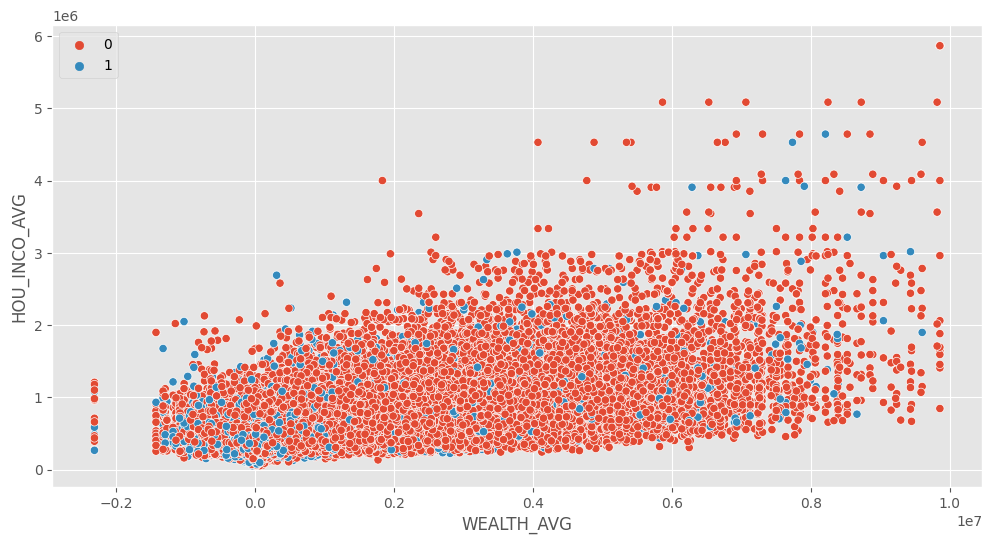

In [ ]:
sns.scatterplot(x= X_train["WEALTH_AVG"], y= X_train["HOU_INCO_AVG"] , hue=np.ravel(y_train))

<Axes: xlabel='EDU_AVG', ylabel='HOU_INCO_AVG'>

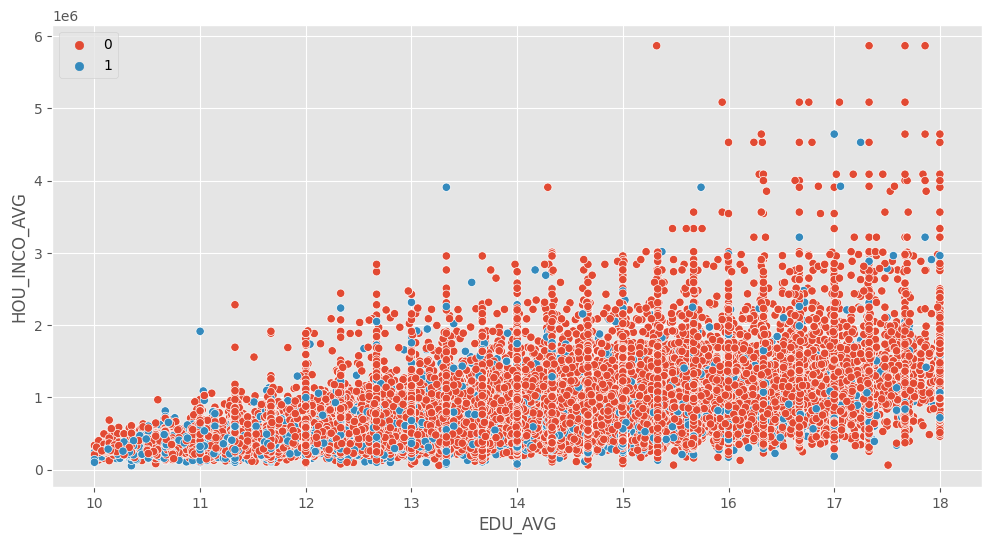

In [ ]:
sns.scatterplot(x= X_train["EDU_AVG"], y= X_train["HOU_INCO_AVG"], hue=np.ravel(y_train))

In [ ]:
pd.concat([X_train.iloc[:,0:20],X_train.iloc[:,-4:]], axis=1)

HOU_HOLHOMOWNR  OWNSHIP  AREA  ROOMS  BUSINESS_ON_ADRESS  CAR_AVG  \
0                    0        1   236      5                   0     1.07   
1                    0        1   120      5                   0     1.55   
2                    0        0    56      1                   0     0.19   
3                    0        1   159      4                   1     1.53   
4                    0        0    62      2                   0     0.34   
...                ...      ...   ...    ...                 ...      ...   
122062               0        1   170      5                   0     1.43   
122063               0        0    96      3                   0     0.75   
122064               0        1    97      4                   0     1.10   
122065               0        0    67      3                   0     0.56   
122066               0        1   186      7                   0     1.19   

        EDU_AVG  HOU_INCO_AVG  SOCGRP_AVG  WEALTH_AVG  ...  USAGE_Apartment  \
0         14.67       1063442    2.204938     3964926  ...                0   
1         15.00        925847    2.706468      847279  ...                0   
2         16.67        568765    2.430348     1616268  ...                1   
3         14.16        775615    2.883951      623570  ...                0   
4         12.00        265705    3.534826     -220226  ...                1   
...         ...           ...         ...         ...  ...              ...   
122062    14.33       1284107    2.363415     4703930  ...                0   
122063    11.45        393734    2.948020      490681  ...                1   
122064    14.00        775201    2.558025     1620647  ...                1   
122065    14.33        370631    2.840796      250698  ...                1   
122066    14.67        755090    2.649383     3352269  ...                0   

        USAGE_Attached houses  USAGE_Dorm  USAGE_Farmhouse  USAGE_Institution  \
0                           0           0                0                  0   
1                           1           0                0                  0   
2                           0           0                0                  0   
3                           0           0                0                  0   
4                           0           0                0                  0   
...                       ...         ...              ...                ...   
122062                      0           0                0                  0   
122063                      0           0                0                  0   
122064                      0           0                0                  0   
122065                      0           0                0                  0   
122066                      0           0                0                  0   

        USAGE_Other  MUNICIPALITY_1  MUNICIPALITY_2  MUNICIPALITY_3  \
0                 0               0               1               0   
1                 0               0               1               0   
2                 0               0               0               1   
3                 0               0               0               1   
4                 0               0               1               0   
...             ...             ...             ...             ...   
122062            0               0               0               0   
122063            0               0               1               0   
122064            0               0               0               0   
122065            0               0               0               1   
122066            0               0               0               1   

        MUNICIPALITY_4  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
122062               1  
122063               0  
122064               1  
122065               0  
122066               0  

[122067

TypeError: ignored

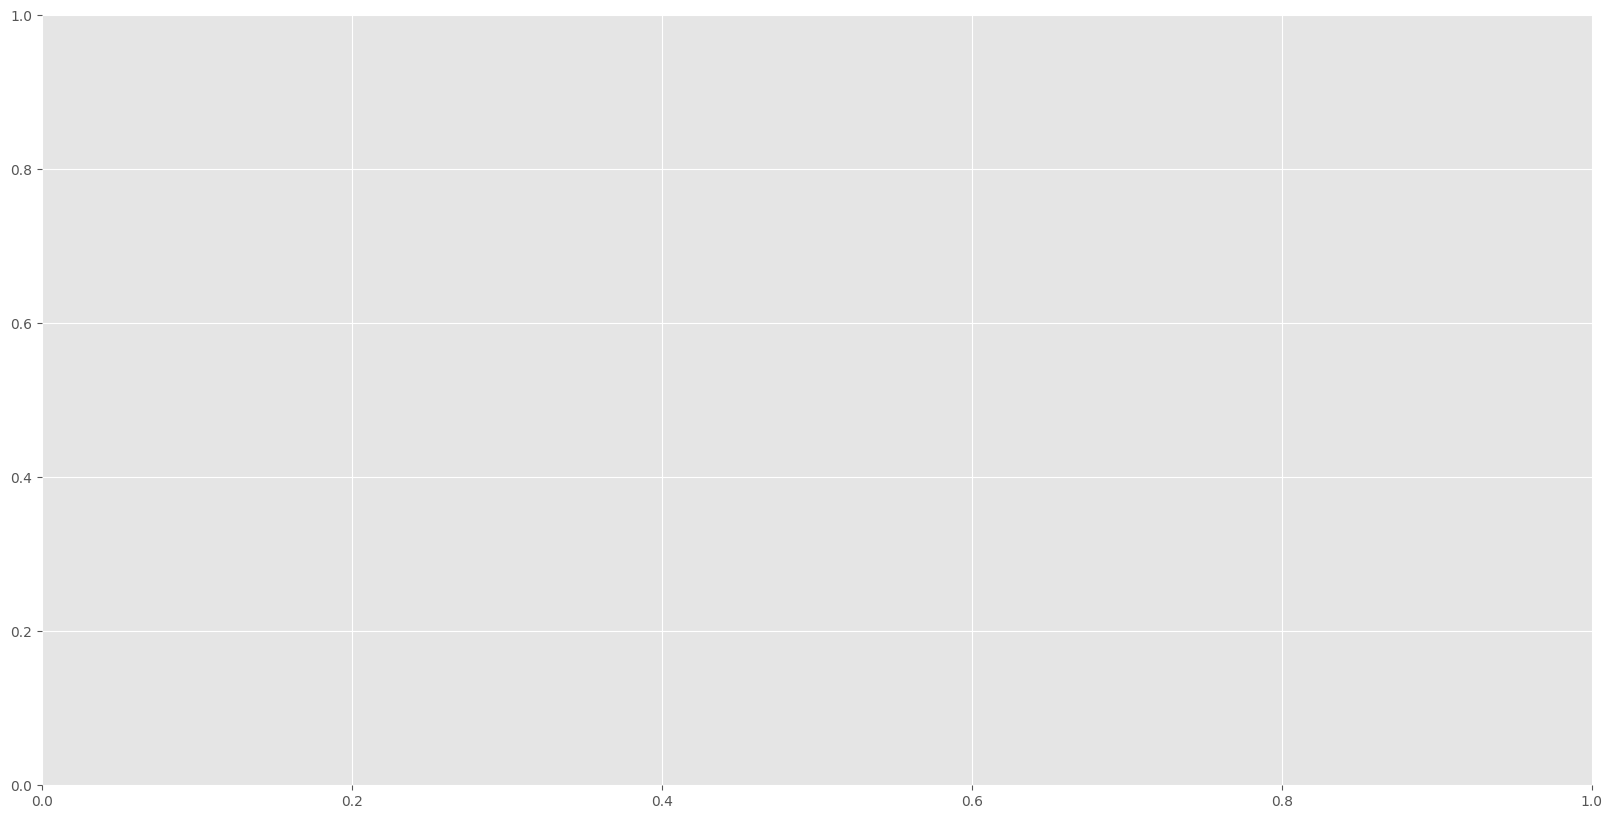

In [ ]:
X_train["Target"] = y_train
corr= pd.concat([X_train.iloc[:,0:20],X_train.iloc[:,-5:]], axis=1).corr()
corr_round = round(corr,2)
corr_round = corr_round.astype(str).replace('^(-)0.|^0.',r'\1.',regex=True)


# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

plt.figure(figsize=(20, 10))
# using the upper triangle matrix as mask
#sns.heatmap(corr, annot=True, mask=matrix)
heatmap = sns.heatmap(corr_round, mask=matrix, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

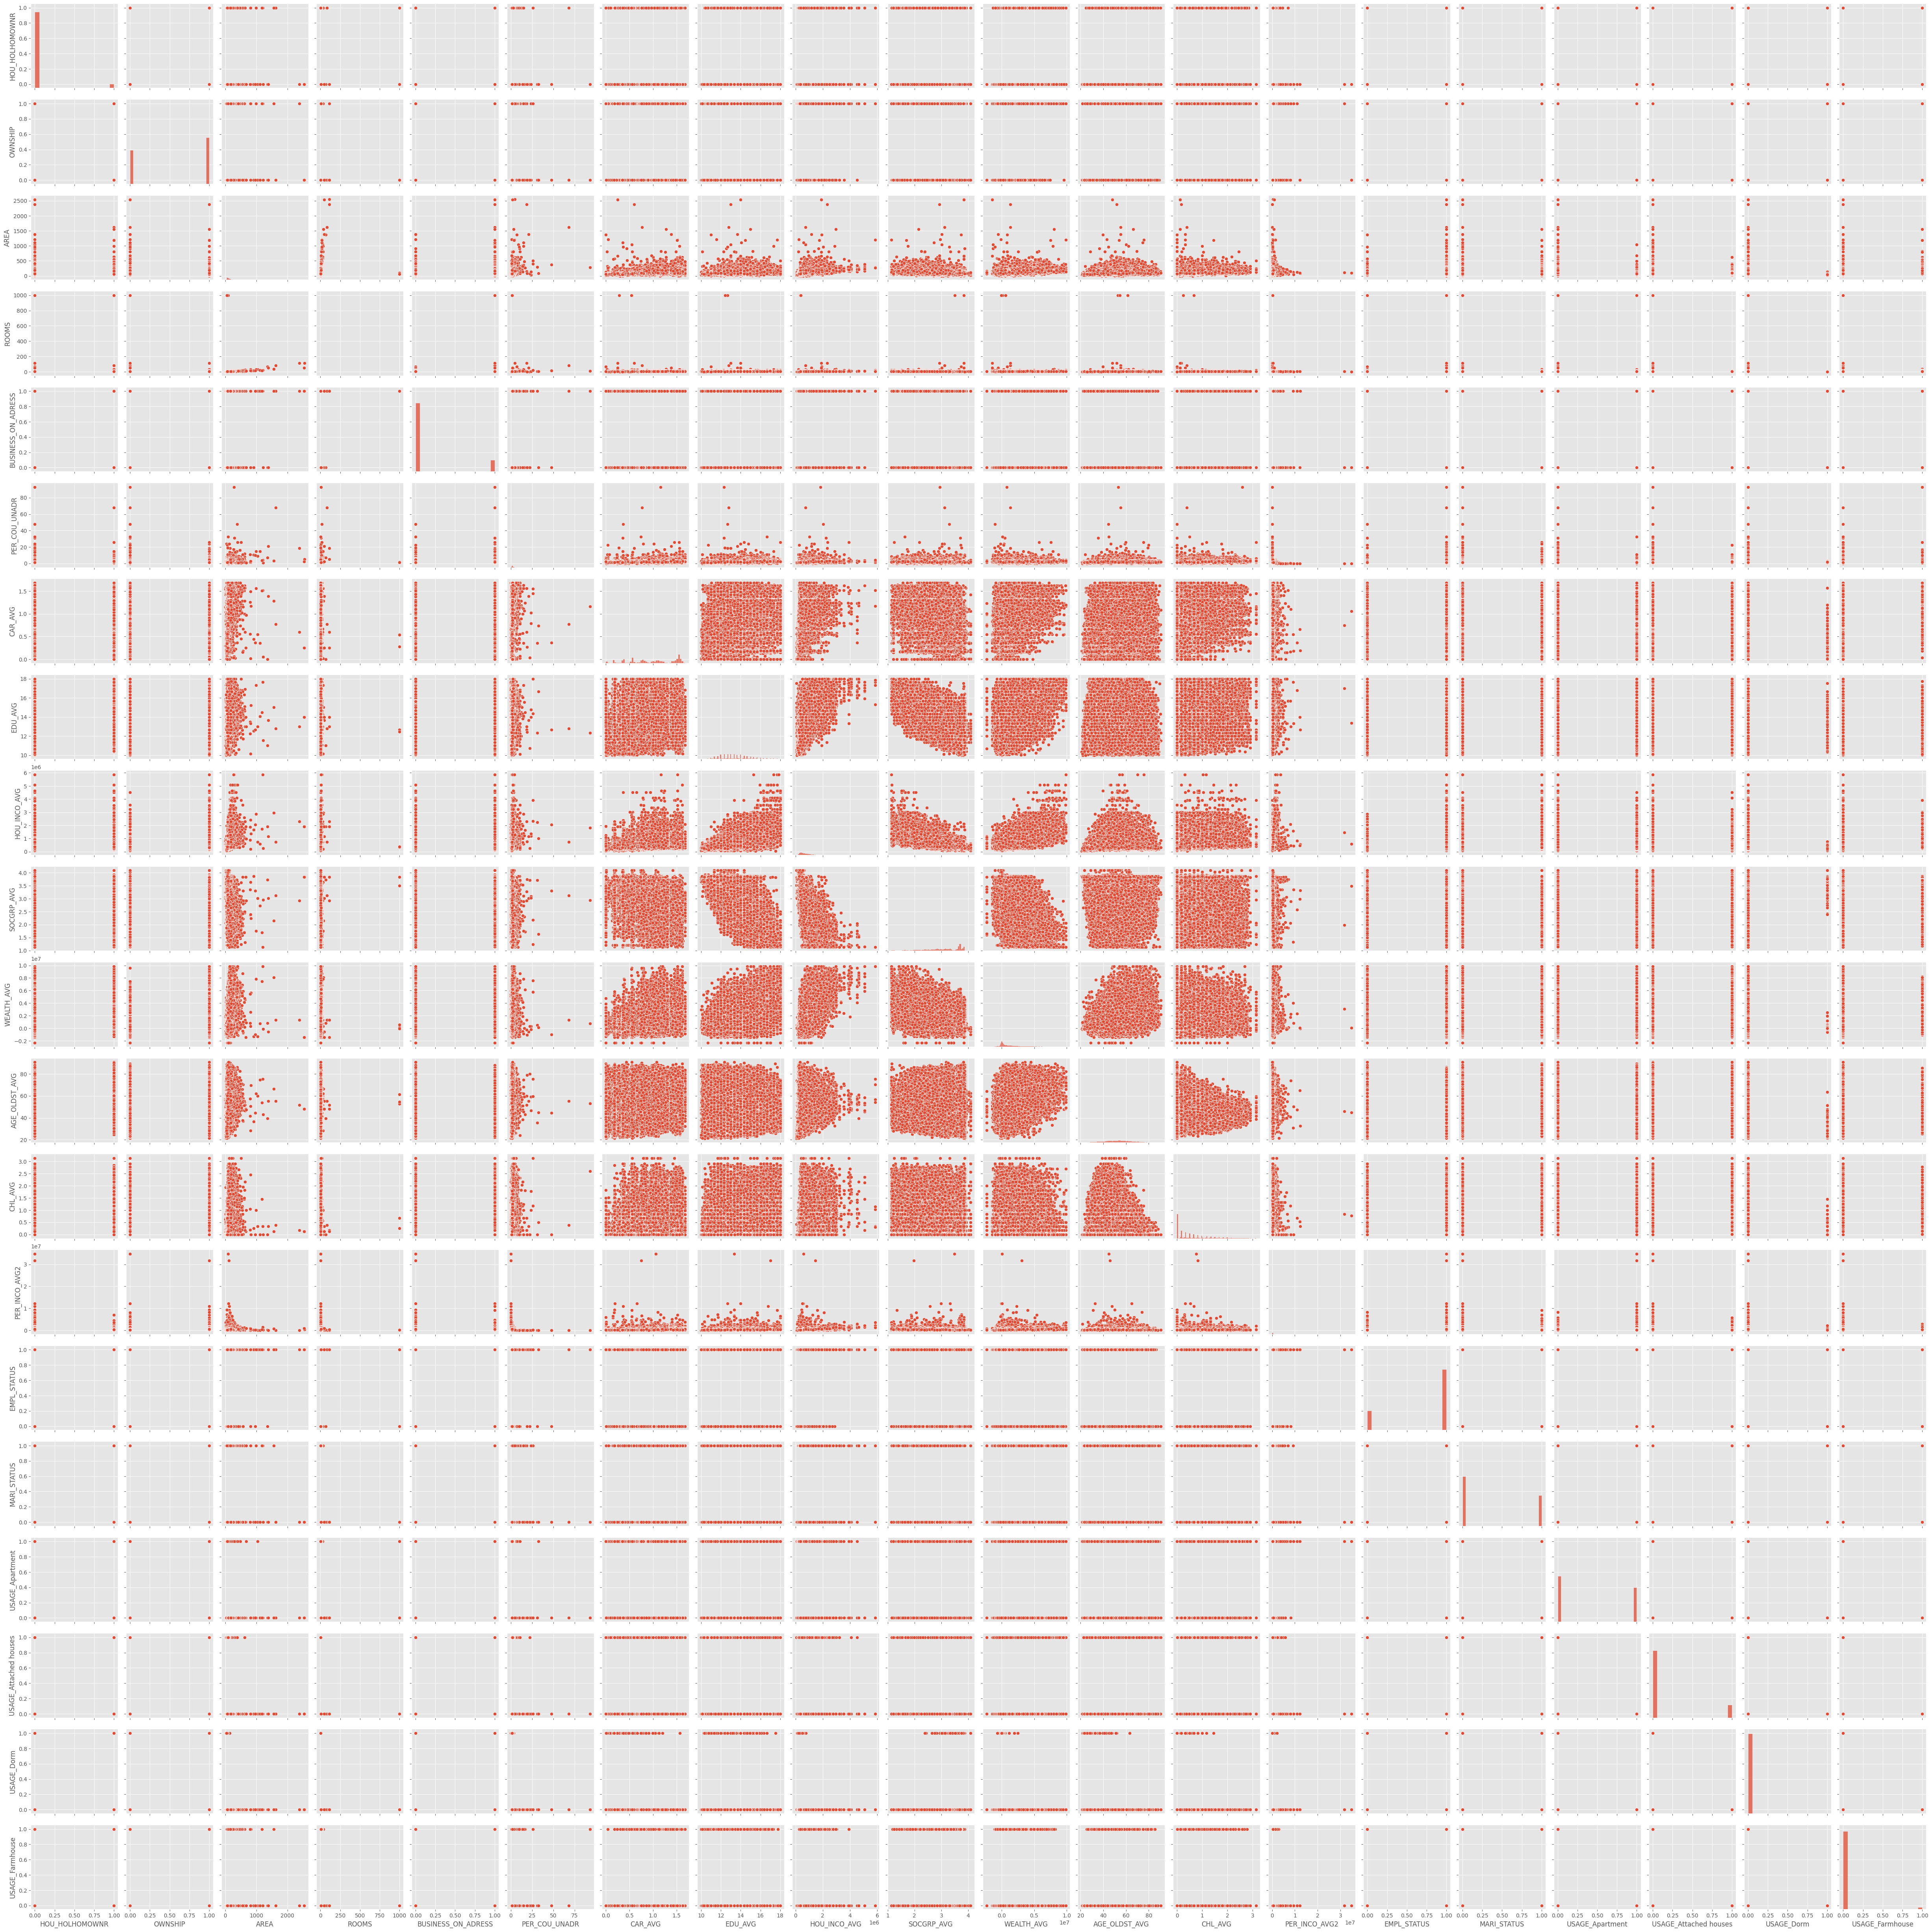

In [ ]:
sns.pairplot(X_train.iloc[:,0:20])

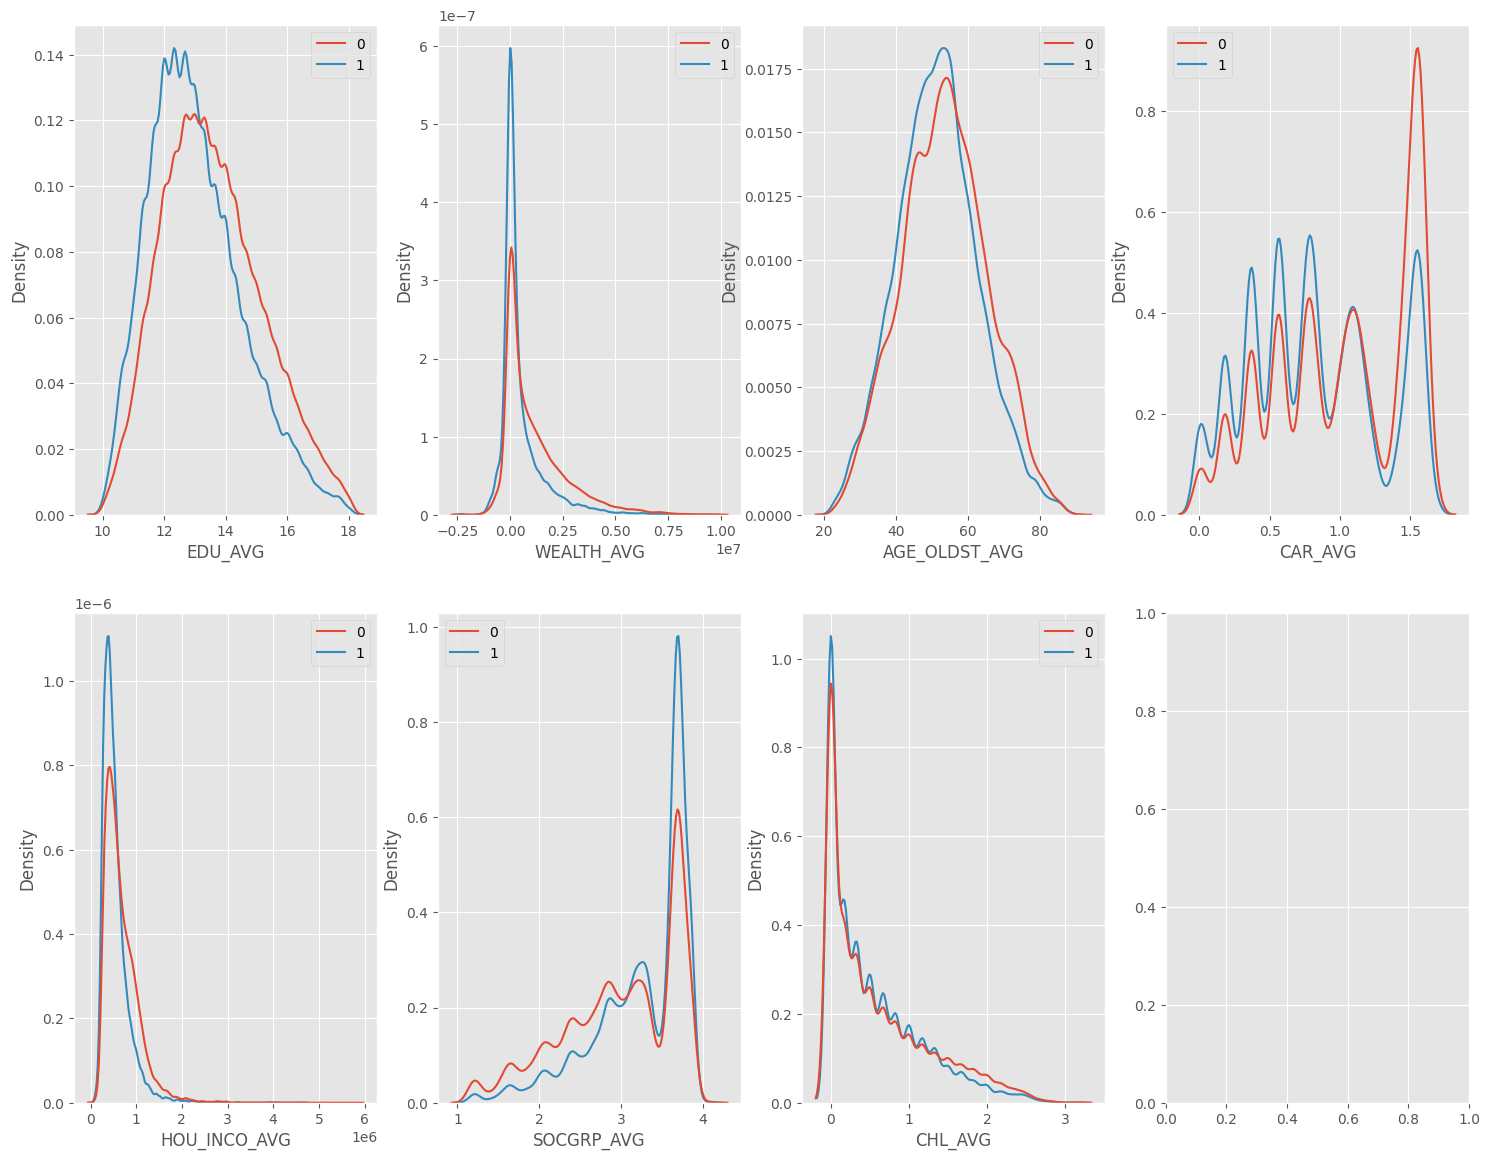

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(18, 14))
sns.kdeplot(X_train, x="EDU_AVG", hue = np.ravel(y_train), common_norm=False, ax=axes[0,0])
sns.kdeplot(X_train, x="WEALTH_AVG", hue = np.ravel(y_train), common_norm=False, ax=axes[0,1])
sns.kdeplot(X_train, x="HOU_INCO_AVG", hue = np.ravel(y_train), common_norm=False, ax=axes[1,0])
sns.kdeplot(X_train, x="SOCGRP_AVG", hue = np.ravel(y_train),common_norm=False, ax=axes[1,1])
sns.kdeplot(X_train, x="AGE_OLDST_AVG", hue = np.ravel(y_train),common_norm=False, ax=axes[0,2])
sns.kdeplot(X_train, x="CHL_AVG", hue = np.ravel(y_train),common_norm=False, ax=axes[1,2])
sns.kdeplot(X_train, x="CAR_AVG", hue = np.ravel(y_train), common_norm=False,ax=axes[0,3])
plt.show()

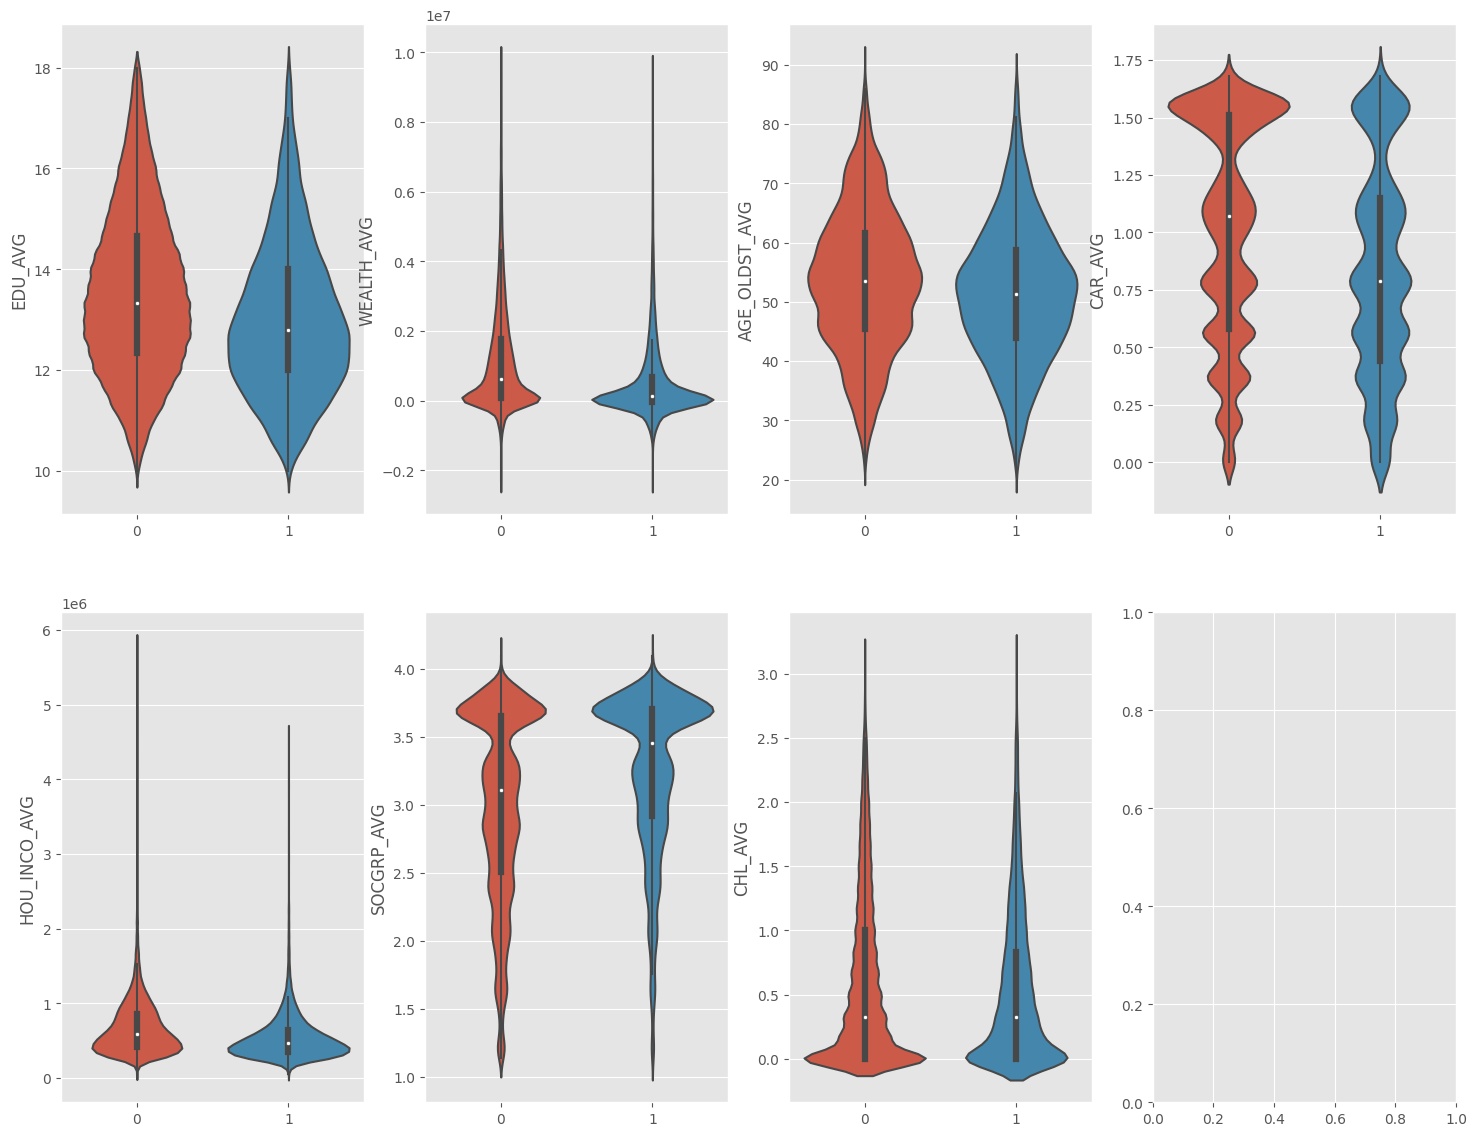

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(18, 14))
sns.violinplot(x=np.ravel(y_train), y="EDU_AVG", data=X_train, kind="box", aspect=1.5, ax=axes[0,0])
sns.violinplot(x=np.ravel(y_train), y="WEALTH_AVG", data=X_train, kind="box", aspect=1.5, ax=axes[0,1])
sns.violinplot(x=np.ravel(y_train), y="HOU_INCO_AVG", data=X_train, kind="box", aspect=1.5, ax=axes[1,0])
sns.violinplot(x=np.ravel(y_train), y="SOCGRP_AVG", data=X_train, kind="box", aspect=1.5, ax=axes[1,1])
sns.violinplot(x=np.ravel(y_train), y="AGE_OLDST_AVG", data=X_train, kind="box", aspect=1.5, ax=axes[0,2])
sns.violinplot(x=np.ravel(y_train), y="CHL_AVG", data=X_train, kind="box", aspect=1.5, ax=axes[1,2])
sns.violinplot(x=np.ravel(y_train), y="CAR_AVG", data=X_train, kind="box", aspect=1.5,ax=axes[0,3])
plt.show()

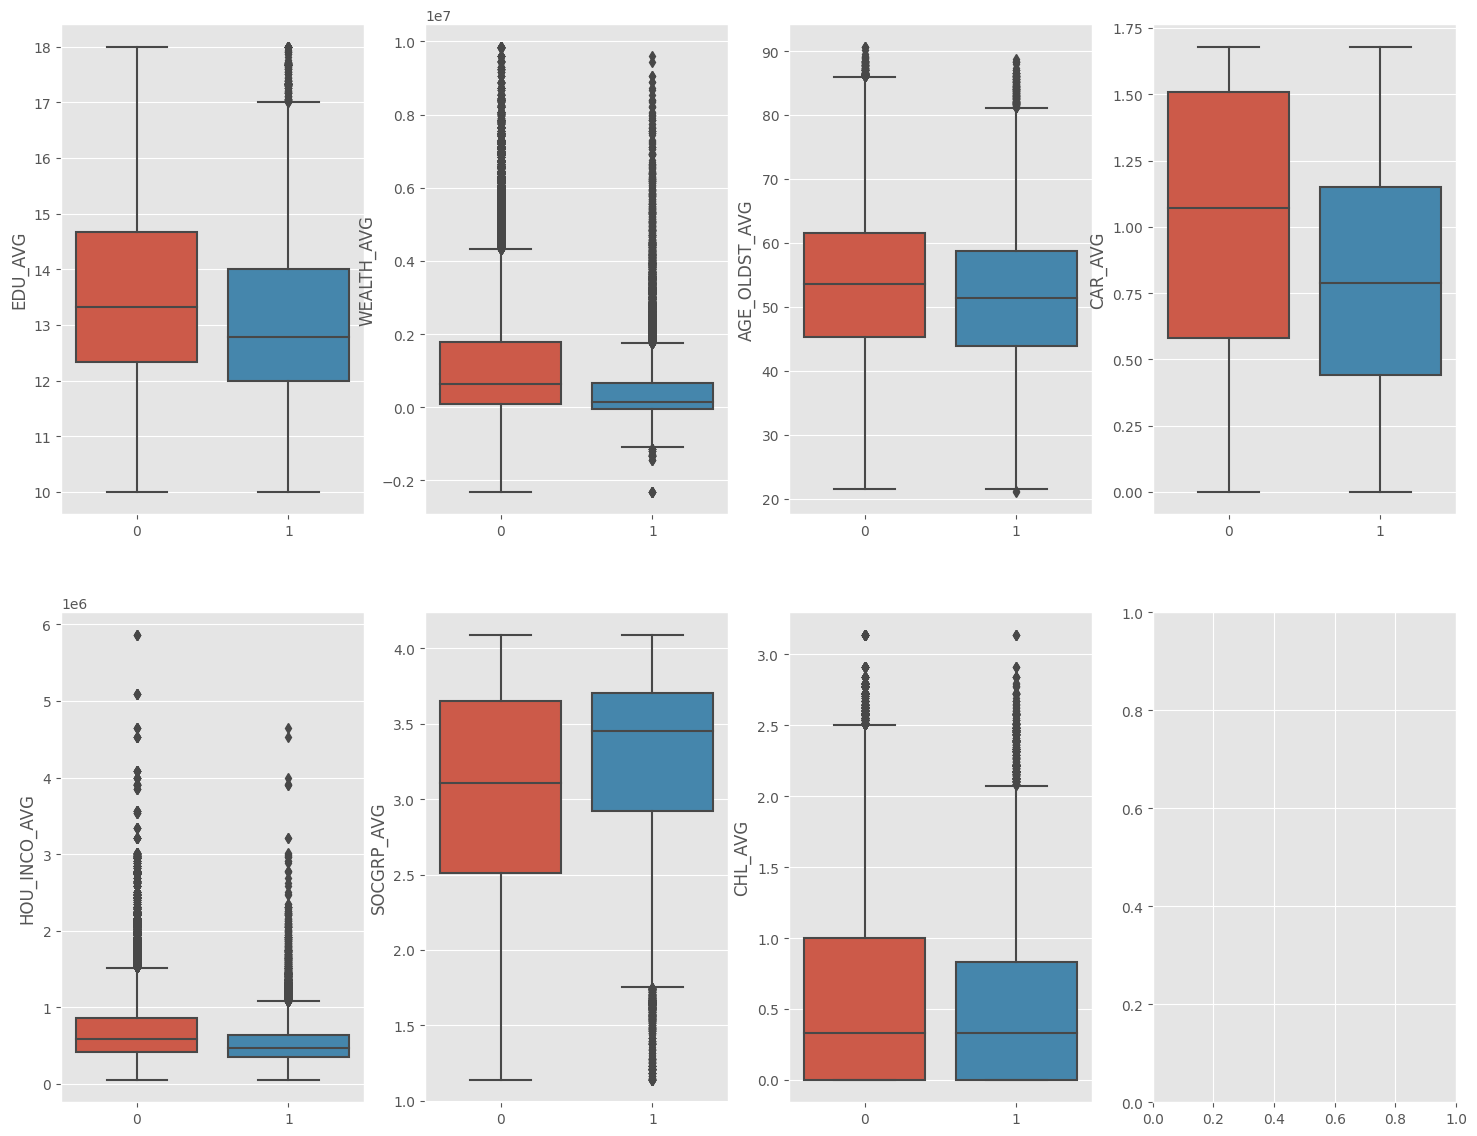

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(18, 14))
sns.boxplot(x=np.ravel(y_train), y="EDU_AVG", data=X_train, ax=axes[0,0])
sns.boxplot(x=np.ravel(y_train), y="WEALTH_AVG", data=X_train, ax=axes[0,1])
sns.boxplot(x=np.ravel(y_train), y="HOU_INCO_AVG", data=X_train, ax=axes[1,0])
sns.boxplot(x=np.ravel(y_train), y="SOCGRP_AVG", data=X_train, ax=axes[1,1])
sns.boxplot(x=np.ravel(y_train), y="AGE_OLDST_AVG", data=X_train, ax=axes[0,2])
sns.boxplot(x=np.ravel(y_train), y="CHL_AVG", data=X_train, ax=axes[1,2])
sns.boxplot(x=np.ravel(y_train), y="CAR_AVG", data=X_train,ax=axes[0,3])
plt.show()

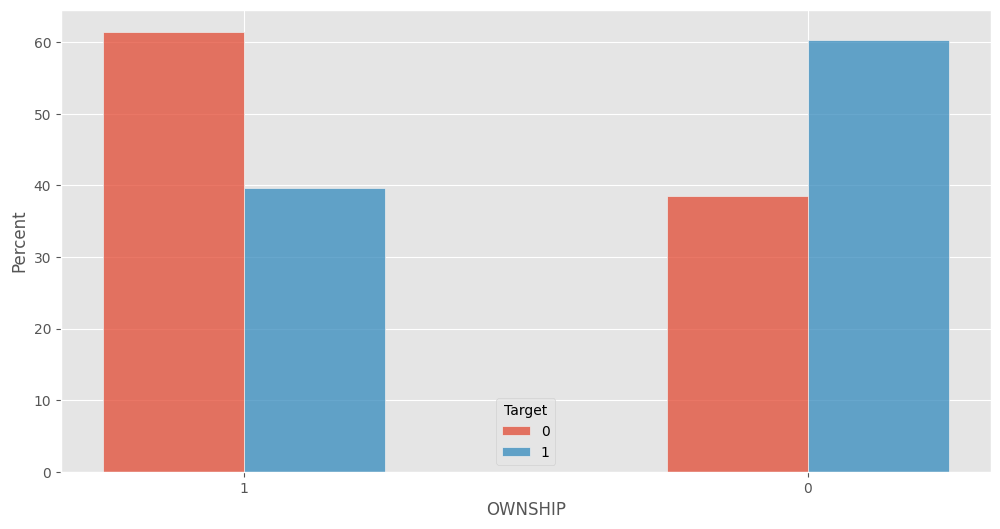

In [ ]:
X_train['Target'] = y_train
X_train['OWNSHIP'] = X_train.OWNSHIP.astype(str)
ax = sns.histplot(x = X_train['OWNSHIP'], hue=X_train['Target'], multiple="dodge",
                  stat = 'percent', shrink = 0.5, common_norm=False)

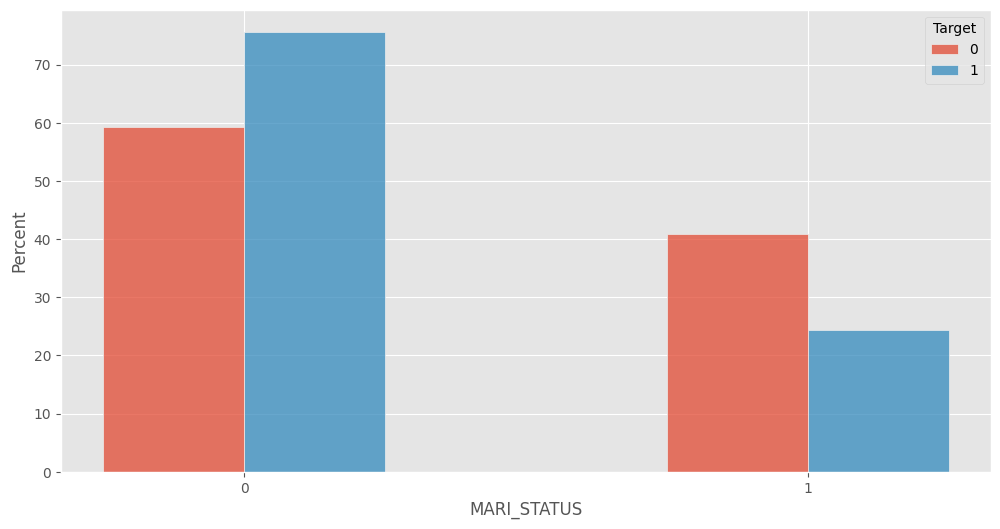

In [ ]:
X_train['MARI_STATUS'] = X_train.MARI_STATUS.astype(str)
ax = sns.histplot(x = X_train['MARI_STATUS'], hue=X_train['Target'], multiple="dodge",
                  stat = 'percent', shrink = 0.5, common_norm=False)

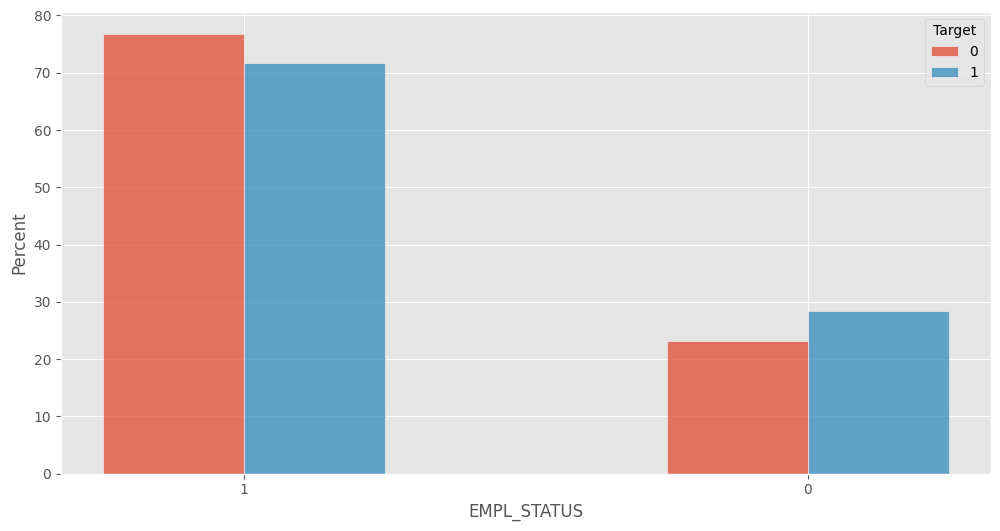

In [ ]:
X_train['EMPL_STATUS'] = X_train.EMPL_STATUS.astype(str)
ax = sns.histplot(x = X_train['EMPL_STATUS'], hue=X_train['Target'], multiple="dodge",
                  stat = 'percent', shrink = 0.5, common_norm=False)

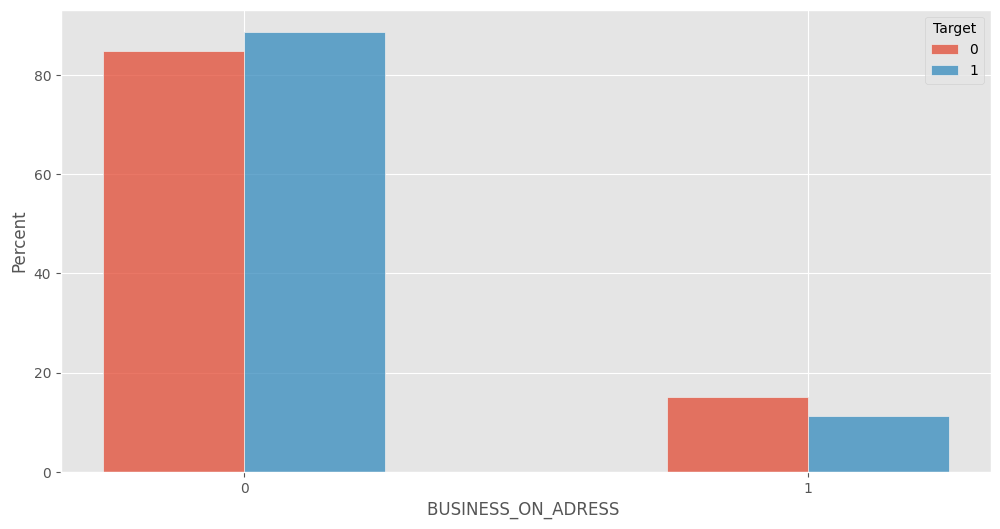

In [ ]:
X_train['BUSINESS_ON_ADRESS '] = X_train.BUSINESS_ON_ADRESS .astype(str)
ax = sns.histplot(x = X_train['BUSINESS_ON_ADRESS '], hue=X_train['Target'], multiple="dodge",
                  stat = 'percent', shrink = 0.5, common_norm=False)

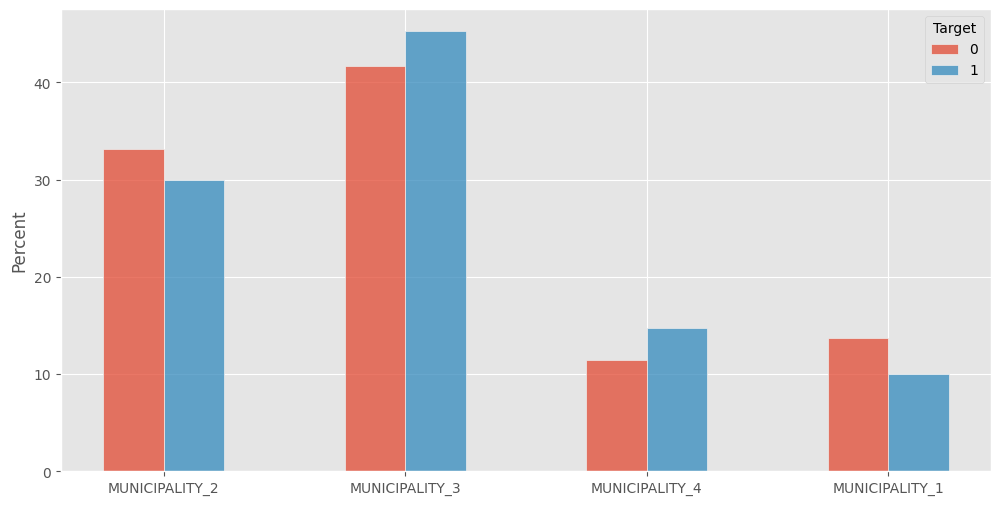

In [ ]:
ax = sns.histplot(x = X_train.iloc[:,60:64].idxmax(axis=1), hue=X_train['Target'], multiple="dodge",
                  stat = 'percent', shrink = 0.5, common_norm=False)

In [ ]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(X_train) # normalizing the features [1,7,8,10,11,12,14,15]
np.mean(x),np.std(x)
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
X_scaled = pd.DataFrame(x,columns=feat_cols)


In [ ]:
from sklearn.decomposition import PCA
pca_bank = PCA(n_components=2)
principalComponents_bank = pca_bank.fit_transform(x)
print('Explained variation per principal component: {}'.format(pca_bank.explained_variance_ratio_))

Explained variation per principal component: [0.10715199 0.04631608]


In [ ]:
results = pd.DataFrame(principalComponents_bank,columns=['pca1','pca2'])

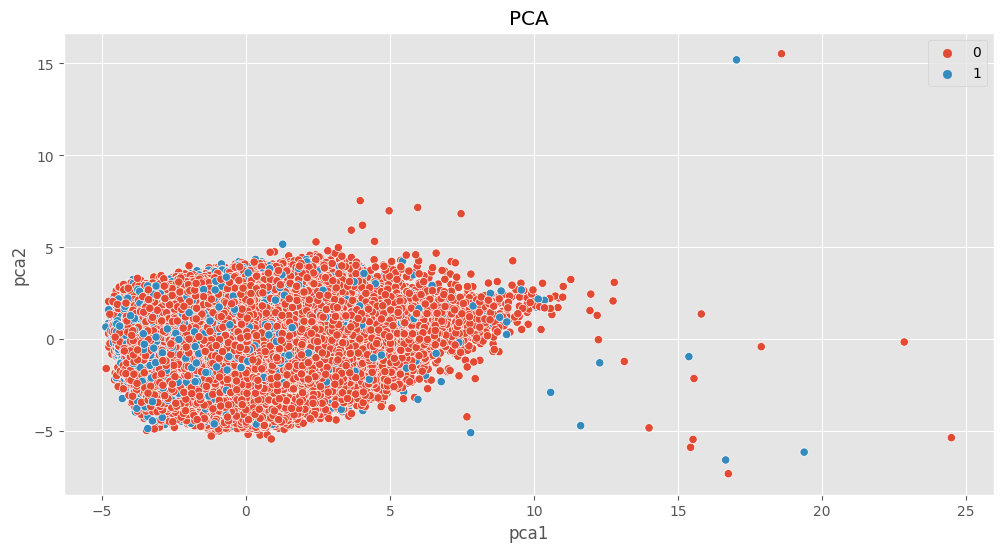

In [ ]:
sns.scatterplot(x="pca1", y="pca2", hue=np.ravel(y_train), data=results)
plt.title('PCA')
plt.show()


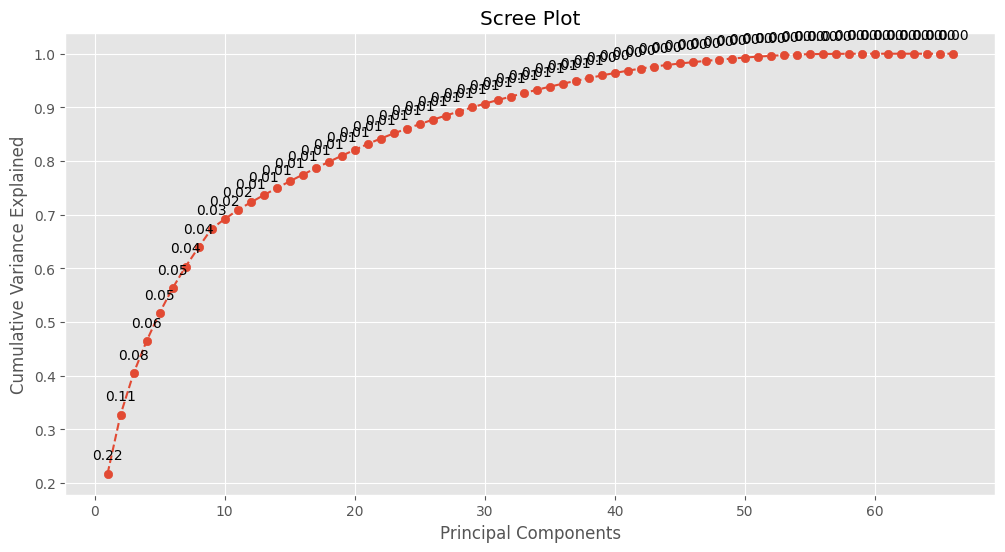

In [ ]:
x = MinMaxScaler((0,1)).fit_transform(X_train.iloc[:,:-1])
pca = PCA(n_components=x.shape[1])
principal_components = pca.fit_transform(x)
variance_explained = pca.explained_variance_ratio_

# Calculate cumulative variance explained
cumulative_variance = np.cumsum(variance_explained)

# Create scatter plot with cumulative variance explained
plt.scatter(range(1, len(cumulative_variance) + 1), cumulative_variance)

# Add labels or annotations
for i, var in enumerate(variance_explained):
    plt.annotate(f"{var:.2f}", (i+1, cumulative_variance[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add line plot for cumulative variance explained
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, linestyle='--')

# Set labels and title
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Scree Plot')

# Display the plot
plt.show()

Cumulative Variances (Percentage):
[21.74657093 32.75472969 40.46524674 46.46740268 51.71188477 56.31780642
 60.33218248 63.93060197 67.40286315 69.1729956  70.87193125 72.2871384
 73.64347611 74.94341794 76.22314114 77.45554401 78.66731466 79.83839167
 80.98551304 82.08469999 83.17478574 84.20143308 85.14229927]
Number of components: 23


Text(0, 0.5, 'Explained variance (%)')

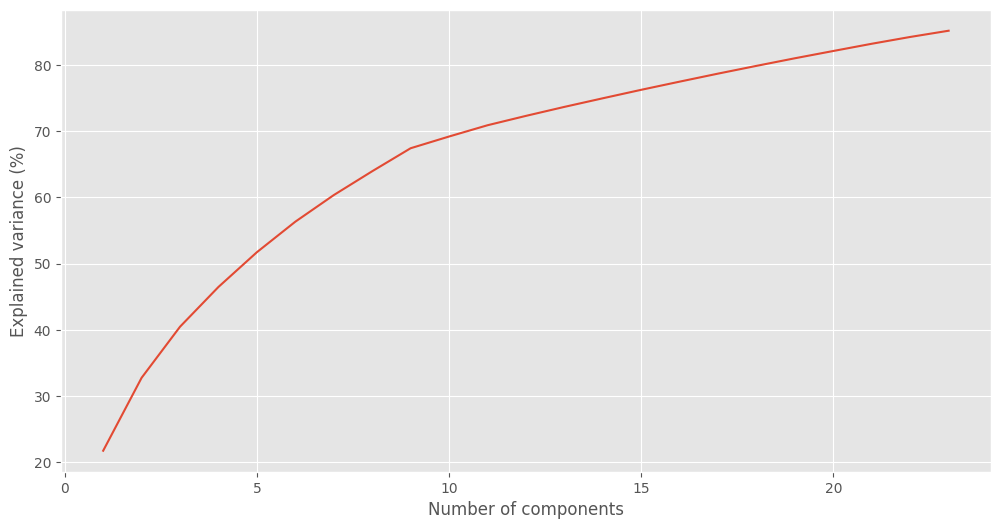

In [ ]:
pca = PCA(n_components = 0.85)
pca.fit(x)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [ ]:
pca_components = abs(pca.components_)
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)

    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]

    # print the top 4 feature names
    print(f'Component {row}: {X_train.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['USAGE_Villa', 'USAGE_Apartment', 'OWNSHIP', 'MARI_STATUS']
Component 1: ['MUNICIPALITY_3', 'MUNICIPALITY_2', 'OWNSHIP', 'USAGE_Attached houses']
Component 2: ['USAGE_Apartment', 'USAGE_Attached houses', 'EMPL_STATUS', 'MUNICIPALITY_2']
Component 3: ['USAGE_Attached houses', 'EMPL_STATUS', 'USAGE_Villa', 'MARI_STATUS']
Component 4: ['MUNICIPALITY_1', 'MUNICIPALITY_2', 'MUNICIPALITY_3', 'MUNICIPALITY_4']
Component 5: ['MARI_STATUS', 'EMPL_STATUS', 'OWNSHIP', 'USAGE_Apartment']
Component 6: ['BUSINESS_ON_ADRESS', 'MUNICIPALITY_1', 'MUNICIPALITY_4', 'USAGE_Villa']
Component 7: ['BUSINESS_ON_ADRESS', 'MUNICIPALITY_4', 'MUNICIPALITY_1', 'CNZTYP_A4']
Component 8: ['OWNSHIP', 'MUNICIPALITY_4', 'USAGE_Villa', 'MUNICIPALITY_1']
Component 9: ['CHL_AVG', 'CNZTYP_A2', 'SOCGRP_AVG', 'EDU_AVG']
Component 10: ['HOU_HOLHOMOWNR', 'SOCGRP_AVG', 'OWNSHIP', 'EDU_AVG']
Component 11: ['HOU_HOLHOMOWNR', 'CNZTYP_A1', 'CNZTYP_E6', 'CNZTYP_E4']
Compo

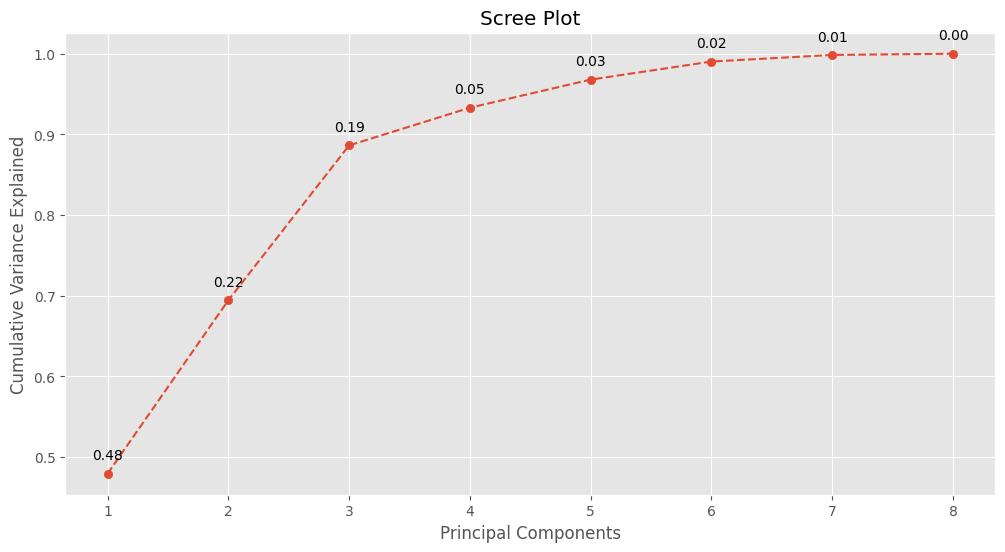

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler((0,1)).fit_transform(X_train.iloc[:,[1,7,8,10,11,12,14,15]])
pca = PCA(n_components=x.shape[1])
principal_components = pca.fit_transform(x)
variance_explained = pca.explained_variance_ratio_

# Calculate cumulative variance explained
cumulative_variance = np.cumsum(variance_explained)

# Create scatter plot with cumulative variance explained
plt.scatter(range(1, len(cumulative_variance) + 1), cumulative_variance)

# Add labels or annotations
for i, var in enumerate(variance_explained):
    plt.annotate(f"{var:.2f}", (i+1, cumulative_variance[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add line plot for cumulative variance explained
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, linestyle='--')

# Set labels and title
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Scree Plot')

# Display the plot
plt.show()

In [ ]:
pca_bank = PCA(n_components=3)
principalComponents_bank = pca_bank.fit_transform(x)
results = pd.DataFrame(principalComponents_bank,columns=['pca1','pca2','pca3'])
print('Explained variation per principal component: {}'.format(pca_bank.explained_variance_ratio_))

Explained variation per principal component: [0.47934754 0.21503659 0.19198208]


Text(0, 0.5, 'Count')

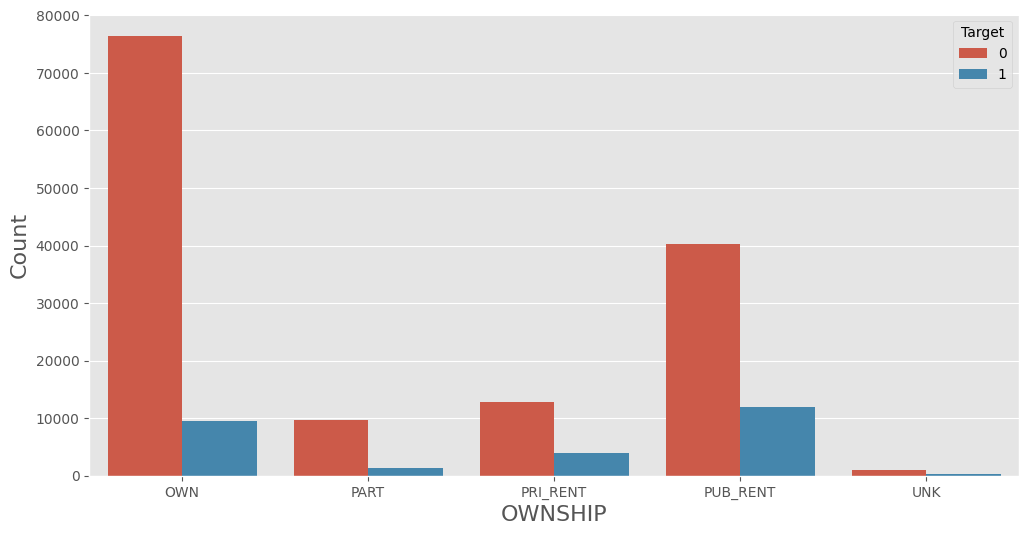

In [ ]:
df['OWNSHIP'] = df.OWNSHIP.astype('category')
sns.countplot(x='OWNSHIP', hue="Target", data=df)
plt.xlabel('OWNSHIP', fontsize=16)
plt.ylabel('Count', fontsize=16)